In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
corpus = [
    'The cats are in the house.',
    'The dogs are in the house and outside.',
    'The cats and dogs are friends.'
]

In [111]:
vectorizer = TfidfVectorizer(
stop_words = "english",
lowercase=True,
ngram_range = (1, 2),
max_features = 15,
min_df = 1,
max_df = 0.8)

X= vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()


In [112]:
words

array(['cats', 'cats dogs', 'cats house', 'dogs', 'dogs friends',
       'dogs house', 'friends', 'house', 'house outside', 'outside'],
      dtype=object)

In [113]:
terms=vectorizer.get_feature_names_out()
df_counts=pd.DataFrame(X.toarray(), columns=terms)

tf=df_counts.div(df_counts.sum(axis=1), axis=0)

print("TF-IDF Matrix:")
print(tf.round(3))

TF-IDF Matrix:
    cats  cats dogs  cats house   dogs  dogs friends  dogs house  friends  \
0  0.302      0.000       0.397  0.000         0.000       0.000    0.000   
1  0.000      0.000       0.000  0.168         0.000       0.221    0.000   
2  0.168      0.221       0.000  0.168         0.221       0.000    0.221   

   house  house outside  outside  
0  0.302          0.000    0.000  
1  0.168          0.221    0.221  
2  0.000          0.000    0.000  


In [114]:
idf_vals=vectorizer.idf_
df_idf=pd.DataFrame({'words':words,'IDF':idf_vals})
print("\nIDF Values:")
print(df_idf.sort_values(by='IDF', ascending=False).round(3))


IDF Values:
           words    IDF
1      cats dogs  1.693
2     cats house  1.693
4   dogs friends  1.693
5     dogs house  1.693
6        friends  1.693
8  house outside  1.693
9        outside  1.693
0           cats  1.288
3           dogs  1.288
7          house  1.288


In [115]:
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.index = [f"Doc {i+1}" for i in range(len(corpus))]
tfidf_df.index
tfidf_df

,cats,cats dogs,cats house,dogs,dogs friends,dogs house,friends,house,house outside,outside
Doc 1,0.517856,0.000000,0.680919,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000,0.000000
Doc 2,0.000000,0.000000,0.000000,0.373022,0.000000,0.490479,0.000000,0.373022,0.490479,0.490479
Doc 3,0.373022,0.490479,0.000000,0.373022,0.490479,0.000000,0.490479,0.000000,0.000000,0.000000


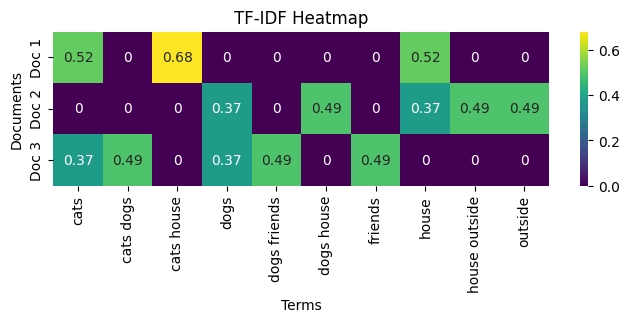

In [116]:
plt.figure(figsize=(8, 2))
sns.heatmap(tfidf_df, annot=True, cmap='viridis')
plt.title('TF-IDF Heatmap')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()

In [117]:
import nltk
import spacy
from nltk.util import ngrams
from collections import Counter



In [118]:
nlp=spacy.load("en_core_web_sm")
docs=[
    "Barack Obama was born in Hawaii. Barack Obama was born in.  He was the 44th President of the United States.",
    "Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino, California.",
    "Python is a programming language used widely in data science."

]

In [119]:
print("Documents:")
for i,doc in enumerate(docs):
    print(f"Doc {i+1}:")
    parsed_doc=nlp(doc)
    for sent in parsed_doc.sents:
        print(f"Sentence: {sent.text} ({sent.label_})")

Documents:
Doc 1:
Sentence: Barack Obama was born in Hawaii. ()
Sentence: Barack Obama was born in.   ()
Sentence: He was the 44th President of the United States. ()
Doc 2:
Sentence: Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino, California. ()
Doc 3:
Sentence: Python is a programming language used widely in data science. ()


In [120]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sumith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
print("Documents:")
for i,doc in enumerate(docs):
    print(f"Doc {i+1}:")


    tokens = nltk.word_tokenize(doc.lower())
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))

    print(f"Bigrams: {Counter(bigrams).most_common(5)}")
    print(f"Trigrams: {Counter(trigrams).most_common(5)}")

Documents:
Doc 1:
Bigrams: [(('barack', 'obama'), 2), (('obama', 'was'), 2), (('was', 'born'), 2), (('born', 'in'), 2), (('in', 'hawaii'), 1)]
Trigrams: [(('barack', 'obama', 'was'), 2), (('obama', 'was', 'born'), 2), (('was', 'born', 'in'), 2), (('born', 'in', 'hawaii'), 1), (('in', 'hawaii', '.'), 1)]
Doc 2:
Bigrams: [(('apple', 'inc.'), 1), (('inc.', 'was'), 1), (('was', 'founded'), 1), (('founded', 'by'), 1), (('by', 'steve'), 1)]
Trigrams: [(('apple', 'inc.', 'was'), 1), (('inc.', 'was', 'founded'), 1), (('was', 'founded', 'by'), 1), (('founded', 'by', 'steve'), 1), (('by', 'steve', 'jobs'), 1)]
Doc 3:
Bigrams: [(('python', 'is'), 1), (('is', 'a'), 1), (('a', 'programming'), 1), (('programming', 'language'), 1), (('language', 'used'), 1)]
Trigrams: [(('python', 'is', 'a'), 1), (('is', 'a', 'programming'), 1), (('a', 'programming', 'language'), 1), (('programming', 'language', 'used'), 1), (('language', 'used', 'widely'), 1)]


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans


In [123]:
nlp = spacy.load("en_core_web_sm")
texts = [
    "Barack Obama was born in Hawaii.",
    "Apple Inc. was founded by Steve Jobs.",
    "Python is a powerful programming language.",
    "Microsoft was founded by Bill Gates.",
    "The United Nations is based in New York.",
    "New York is a major tech hub."
]
labels = [1, 1, 0, 1, 1, 0]  # 1 = org/person-based, 0 = neutral/technical
# labels = [
#     1,  # Barack Obama
#     1,  # Apple Inc., Steve Jobs
#     0,  # Python (general programming language)
#     1,  # Microsoft, Bill Gates
#     1,  # United Nations, New York
#     0,  # New York (location, no named entity as focus)
#     1,  # Elon Musk, SpaceX
#     0,  # Eiffel Tower, Paris (location and landmark)
#     1,  # Amazon, Jeff Bezos
#     1,  # Google, Larry Page, Sergey Brin
#     0,  # Great Wall of China (landmark)
#     1,  # Tesla
#     1,  # Facebook
#     0,  # Java (technology)
#     0,  # iPhone (product)
#     1,  # NASA
#     0,  # Taj Mahal (landmark)
#     0,  # Linux (OS, no named person/org)
#     0,  # Pacific Ocean
#     1,  # Walt Disney, The Walt Disney Company
#     0   # Internet (general tech)
# ]


In [124]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,labels ,test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [126]:
KMeans = KMeans(n_clusters=2, random_state=42)
clusters=KMeans.fit_predict(X)

print("Cluster Centers:")
print("\n predicted Actual labels")
for i, predict in enumerate(clusters):
    print(f"Doc {i+1}: Predicted Cluster {predict}, Actual Label {labels[i]}")

Cluster Centers:

 predicted Actual labels
Doc 1: Predicted Cluster 1, Actual Label 1
Doc 2: Predicted Cluster 0, Actual Label 1
Doc 3: Predicted Cluster 0, Actual Label 0
Doc 4: Predicted Cluster 0, Actual Label 1
Doc 5: Predicted Cluster 1, Actual Label 1
Doc 6: Predicted Cluster 1, Actual Label 0
